In [ ]:
Name:K.Anoosha
Batch no:184
Email id:karavaanushareddy@gmail.com    
    

###### Task - Prepare the Data and build a model to predict the churn of a customer.

# Introduction
Churn prediction is probably one of the most important applications of data science in the commercial sector.
The thing which makes it popular is that its effects are more tangible to comprehend and it plays a major factor in the overall  profits earned by the business.

###### Importing neccessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 1: Gather the data

In [16]:
df=pd.read_csv(r"C:\Users\Anusha\Downloads\churn_dataset.csv")

#### Step 2: Assess and clean the data

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [13]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [14]:
df.shape

(7043, 20)

In [9]:
df.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [17]:
df.drop(columns= 'customerID', axis=1, inplace=True)
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [18]:
df.dropna(how = 'any', inplace = True)

In [19]:
# The data type of “TotalCharges” should be the float64 type instead of the object type.
# first copying the data set.
df_copy= df.copy()


In [20]:
df_copy.TotalCharges = None
df_copy.TotalCharges=df_copy.TotalCharges.astype(float)

In [21]:
df_copy.TotalCharges.dtype

dtype('float64')

In [22]:
bins = [-1, 12, 24, 36, 48, 60, 72]
labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '61-72']
df['tenure_grouped'] = pd.cut(df['tenure'], bins=bins, labels=labels)

In [23]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_grouped
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,25-36


<AxesSubplot:>

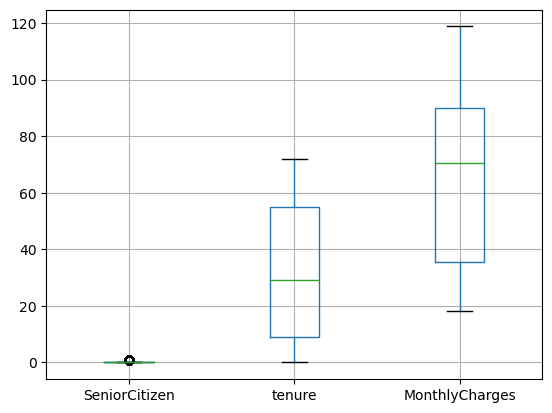

In [24]:
# checking oultlier is there are not
df.boxplot()

In [25]:
df = df.drop(columns = 'tenure')

In [26]:
## no outlers can proceed EDA

# EXPLORATORY DATA ANALYSIS (EDA)

## Data VIsualization

#### Univariance Analysis

In [28]:
df['SeniorCitizen'].dtype

dtype('int64')

In [29]:
print(df['SeniorCitizen'].median())

0.0


In [30]:
df['SeniorCitizen'].std()

0.36861160561002687

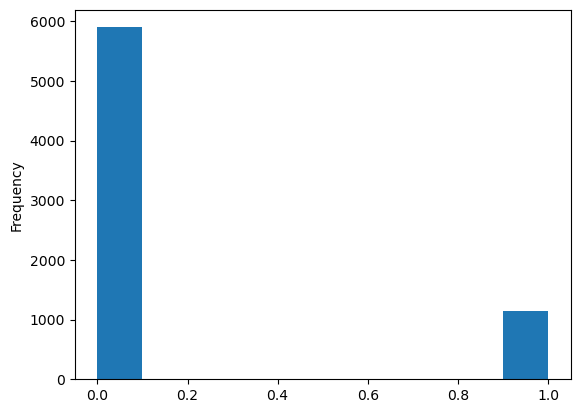

In [31]:
df['SeniorCitizen'].plot(kind='hist')
plt.show()

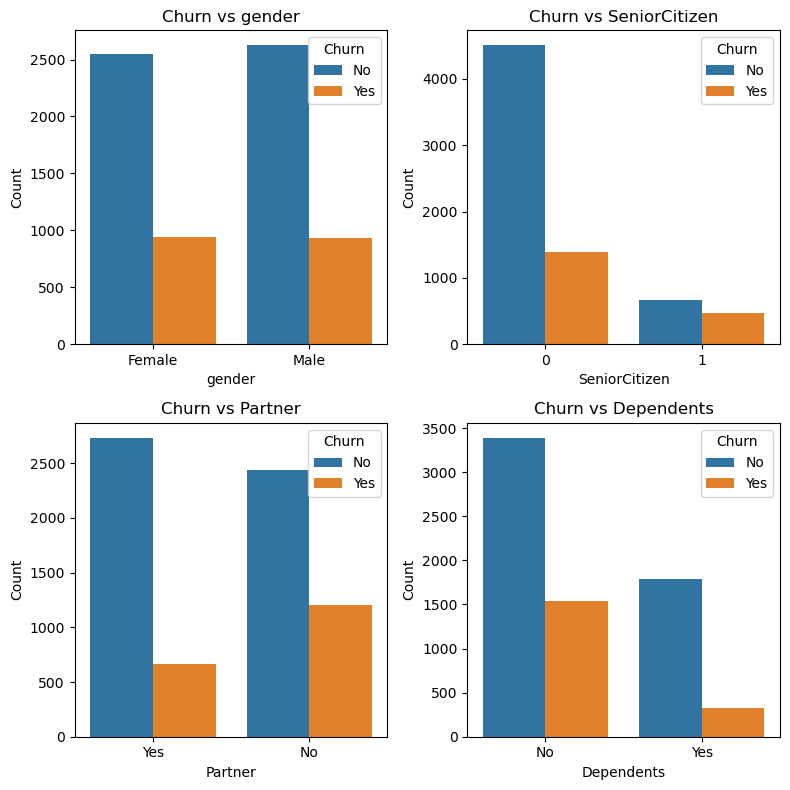

In [32]:
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

for i, ax in enumerate(axes.flat):
    if i < len(cols):
        sns.countplot(data=df, x=cols[i], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[i]}')
        ax.set_xlabel(cols[i])
        ax.set_ylabel('Count')
        
plt.tight_layout()
plt.show()


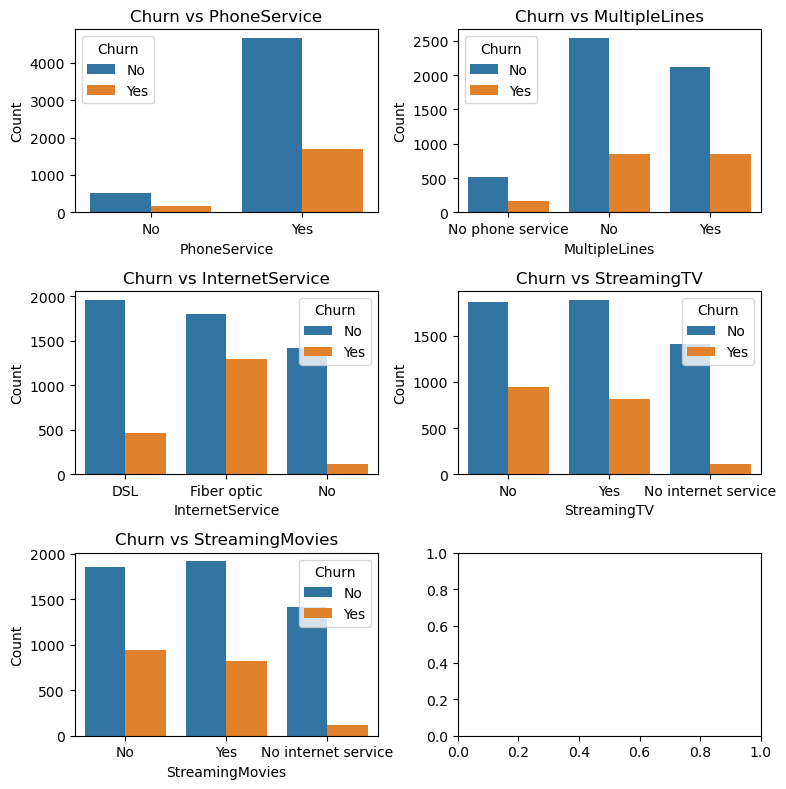

In [33]:
services = df[['Churn', 'PhoneService', 'MultipleLines', 'InternetService','StreamingTV', 'StreamingMovies']]
cols = services.columns[1:]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8,8))

for i, ax in enumerate(axes.flat):
    if i < len(cols):
        sns.countplot(data=services, x=cols[i], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[i]}')
        ax.set_xlabel(cols[i])
        ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

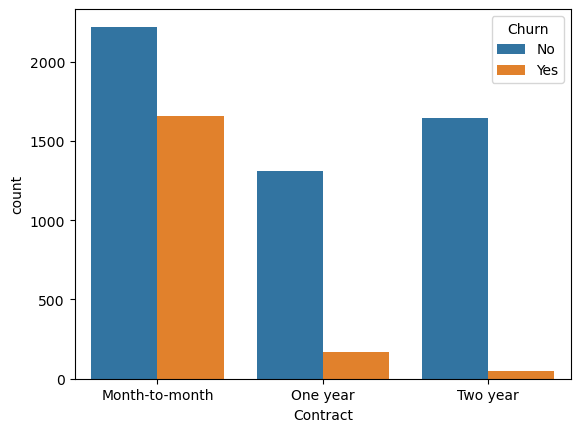

In [34]:
sns.countplot(data=df, x=df['Contract'], hue='Churn')
plt.show()

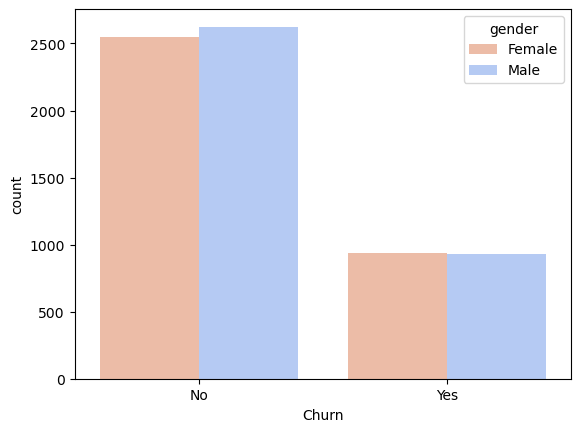

In [35]:
sns.countplot(x='Churn',data=df,hue='gender',palette="coolwarm_r")
plt.show()

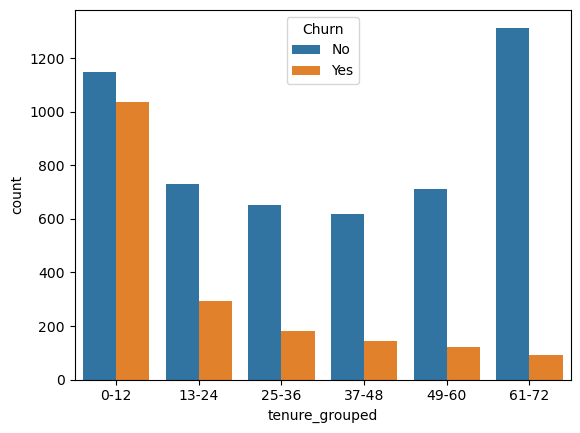

In [36]:
sns.countplot(data = df, x = 'tenure_grouped', hue = 'Churn')
plt.show()

In [37]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_grouped'],
      dtype='object')

###### Bivariance Analysis

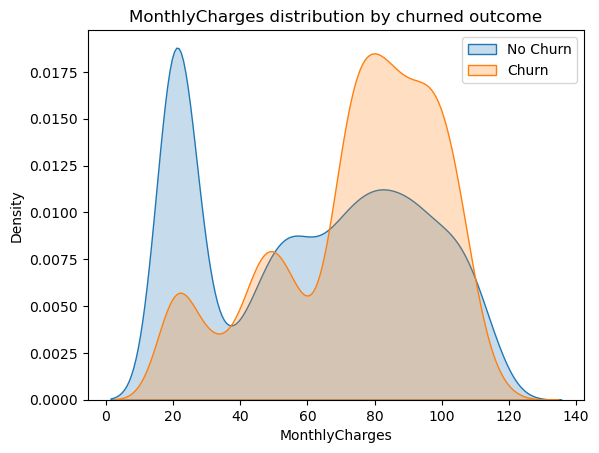

In [38]:
sns.kdeplot(df['MonthlyCharges'][df['Churn']=='No'], label='Churn - No', shade = True)
sns.kdeplot(df['MonthlyCharges'][df['Churn']=='Yes'], label='Churn - Yes', shade = True)
plt.legend(["No Churn","Churn"],loc='upper right')
plt.xlabel('MonthlyCharges')
plt.title('MonthlyCharges distribution by churned outcome')
plt.show()

# Data Preprossing

##### One Hot Encoding

In [39]:
df['Churn'] = np.where(df['Churn'] == 'Yes', 1 ,0)

In [40]:
df = pd.get_dummies(df)
df.head()

,SeniorCitizen,MonthlyCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,tenure_grouped_0-12,tenure_grouped_13-24,tenure_grouped_25-36,tenure_grouped_37-48,tenure_grouped_49-60,tenure_grouped_61-72
0,0,29.85,0,1,0,0,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0,56.95,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,53.85,1,0,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,42.30,0,0,1,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,70.70,1,1,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


##### Split Dependent and Independent variables

In [41]:
churn_counts = df['Churn'].value_counts()
churn_ratio = churn_counts[0] / churn_counts[1]

In [42]:
print("The ratio between retained customers and churners is",churn_ratio)

The ratio between retained customers and churners is 2.7683253076511503


In [43]:
X = df.copy()

In [44]:
X = df.drop('Churn', axis = 1)

In [45]:
X

,SeniorCitizen,MonthlyCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,tenure_grouped_0-12,tenure_grouped_13-24,tenure_grouped_25-36,tenure_grouped_37-48,tenure_grouped_49-60,tenure_grouped_61-72
0,0,29.85,1,0,0,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,56.95,0,1,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0,53.85,0,1,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0,42.30,0,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,70.70,1,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,84.80,0,1,0,1,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
7039,0,103.20,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
7040,0,29.60,1,0,0,1,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
7041,1,74.40,0,1,0,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [46]:
y = df['Churn']

In [47]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

### Split dataset into Train and Test

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [103]:
X_train

,SeniorCitizen,MonthlyCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,tenure_grouped_0-12,tenure_grouped_13-24,tenure_grouped_25-36,tenure_grouped_37-48,tenure_grouped_49-60,tenure_grouped_61-72
1182,0,53.75,0,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4328,0,51.10,1,0,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
6091,1,86.85,0,1,0,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4870,0,64.40,0,1,1,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
4683,0,94.10,0,1,1,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,0,49.80,0,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3441,0,60.80,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
1344,0,20.50,1,0,0,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4623,1,95.35,0,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [51]:
y_train

1182    0
4328    0
6091    1
4870    0
4683    0
       ..
1180    0
3441    0
1344    0
4623    0
1289    0
Name: Churn, Length: 5634, dtype: int32

## Feature Scaling

In [52]:
from sklearn.preprocessing import MinMaxScaler

In [53]:
#create object of MinMaxScaler
sc = MinMaxScaler()

In [54]:
pd.DataFrame(sc.fit_transform(X_train))

,0,1,2,3,4,5,6,7,8,9,...,6570,6571,6572,6573,6574,6575,6576,6577,6578,6579
0,0.0,0.353234,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.326866,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.682587,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.459204,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.754726,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0.0,0.313930,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5630,0.0,0.423383,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5631,0.0,0.022388,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5632,1.0,0.767164,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


###### Standardization 

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
sc = StandardScaler()

In [57]:
pd.DataFrame(sc.fit_transform(X_train))

,0,1,2,3,4,5,6,7,8,9,...,6570,6571,6572,6573,6574,6575,6576,6577,6578,6579
0,-0.441486,-0.371599,-0.994689,0.994689,0.968546,-0.968546,0.659028,-0.659028,3.052652,-3.052652,...,-0.013324,0.0,0.0,-0.013324,-0.676255,-0.403842,-0.370490,-0.349730,2.731201,-0.497003
1,-0.441486,-0.459879,1.005339,-1.005339,-1.032476,1.032476,0.659028,-0.659028,-0.327584,0.327584,...,-0.013324,0.0,0.0,-0.013324,-0.676255,2.476216,-0.370490,-0.349730,-0.366139,-0.497003
2,2.265078,0.731063,-0.994689,0.994689,-1.032476,1.032476,0.659028,-0.659028,-0.327584,0.327584,...,-0.013324,0.0,0.0,-0.013324,1.478733,-0.403842,-0.370490,-0.349730,-0.366139,-0.497003
3,-0.441486,-0.016815,-0.994689,0.994689,0.968546,-0.968546,-1.517387,1.517387,-0.327584,0.327584,...,-0.013324,0.0,0.0,-0.013324,-0.676255,-0.403842,-0.370490,2.859352,-0.366139,-0.497003
4,-0.441486,0.972583,-0.994689,0.994689,0.968546,-0.968546,0.659028,-0.659028,-0.327584,0.327584,...,-0.013324,0.0,0.0,-0.013324,-0.676255,2.476216,-0.370490,-0.349730,-0.366139,-0.497003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,-0.441486,-0.503186,-0.994689,0.994689,0.968546,-0.968546,0.659028,-0.659028,-0.327584,0.327584,...,-0.013324,0.0,0.0,-0.013324,-0.676255,-0.403842,-0.370490,2.859352,-0.366139,-0.497003
5630,-0.441486,-0.136742,1.005339,-1.005339,-1.032476,1.032476,-1.517387,1.517387,-0.327584,0.327584,...,-0.013324,0.0,0.0,-0.013324,-0.676255,-0.403842,2.699128,-0.349730,-0.366139,-0.497003
5631,-0.441486,-1.479259,1.005339,-1.005339,-1.032476,1.032476,0.659028,-0.659028,-0.327584,0.327584,...,-0.013324,0.0,0.0,-0.013324,-0.676255,-0.403842,2.699128,-0.349730,-0.366139,-0.497003
5632,2.265078,1.014224,-0.994689,0.994689,-1.032476,1.032476,0.659028,-0.659028,-0.327584,0.327584,...,-0.013324,0.0,0.0,-0.013324,-0.676255,-0.403842,-0.370490,-0.349730,-0.366139,2.012060


## Model Training Phase 

#### Build Simple linear regression model and Multiple regression

In [50]:
#import the model class
from sklearn.linear_model import LinearRegression

In [51]:
# init the model
# creating the constructor
lr_model = LinearRegression()

In [52]:
#train the model
#fit --train the model
lr_model.fit(X_train, y_train)

LinearRegression()

In [53]:
lr_model.coef_

array([ 1.39946330e-01, -2.28893806e-02,  3.43268156e+09, ...,
        1.52228948e+06,  1.52228949e+06,  1.52228969e+06])

In [54]:
lr_model.intercept_

-13802049663.94055

#### Test the model -- Prediction

In [55]:
mlr_model = LinearRegression()

In [56]:
# prediction -- testing
mlr_model.fit(X_train, y_train)

LinearRegression()

In [57]:
X_test

,SeniorCitizen,MonthlyCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,tenure_grouped_0-12,tenure_grouped_13-24,tenure_grouped_25-36,tenure_grouped_37-48,tenure_grouped_49-60,tenure_grouped_61-72
6418,0,79.30,0,1,0,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1948,0,80.75,1,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4497,1,97.95,0,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
66,0,78.90,0,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1705,1,90.45,1,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1901,0,20.15,1,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
5938,1,108.90,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
6373,0,92.95,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
1767,0,115.15,1,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [58]:
y_pred = mlr_model.predict(X_test)

In [59]:
# Prediction


y_pred

array([-149318.71221733, -149318.13352013, -149318.24390221, ...,
       -149318.20675087, -149318.48471069, -149318.07782555])

#### Evaluate the model performance

In [104]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [105]:
mse = mean_squared_error(y_test, y_pred)

In [106]:
mse #squared deviation

0.20652945351312987

In [107]:
rmse = np.sqrt(mse)

In [108]:
rmse

0.45445511716024267

In [109]:
mae = mean_absolute_error(y_test, y_pred) 

In [110]:
mae

0.20652945351312987

In [111]:
np.set_printoptions(precision = 2, suppress = True)

In [112]:
X_train.head(2)


,SeniorCitizen,MonthlyCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,tenure_grouped_0-12,tenure_grouped_13-24,tenure_grouped_25-36,tenure_grouped_37-48,tenure_grouped_49-60,tenure_grouped_61-72
1182,0,53.75,0,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4328,0,51.10,1,0,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [70]:
mlr_model.intercept_

-13802049663.94055

### Save the model

In [71]:
mlr_model

LinearRegression()

In [72]:
import joblib

In [73]:
#model--object
#file name
joblib.dump(mlr_model, "chunk prediction.pkl")

['chunk prediction.pkl']

# Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression
lor_model = LogisticRegression()

In [75]:
lor_model.fit(X_train, y_train)

C:\Karava\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Prediction

In [76]:
y_pred = lor_model.predict(X_test)

In [77]:
y_pred

array([0, 1, 0, ..., 0, 0, 1])

In [78]:
y_test

6418    0
1948    1
4497    0
66      0
1705    0
       ..
1901    0
5938    0
6373    0
1767    0
2184    1
Name: Churn, Length: 1409, dtype: int32

## Evaluate the classification model

### Accuracy Score

In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [80]:
y_pred = lor_model.predict(X_test)

In [81]:
#accuracy_score = no of correct prediction / total no of predictions
print("Test Accuracy Score:", accuracy_score(y_test, y_pred) * 100,"%")

Test Accuracy Score: 80.0567778566359 %


In [82]:
y_pred_train = lor_model.predict(X_train)

In [83]:
print("Train Accuracy Score:", accuracy_score(y_train, y_pred_train) * 100,"%")

Train Accuracy Score: 82.0376286829961 %


In [79]:
from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix

In [85]:
y_train.value_counts()

0    4108
1    1526
Name: Churn, dtype: int64

In [86]:
y_train.value_counts() / len(y_train) #check imbalance

0    0.729144
1    0.270856
Name: Churn, dtype: float64

In [87]:
cm_test = confusion_matrix(y_test, y_pred)

In [88]:
cm_test

array([[957, 109],
       [172, 171]], dtype=int64)

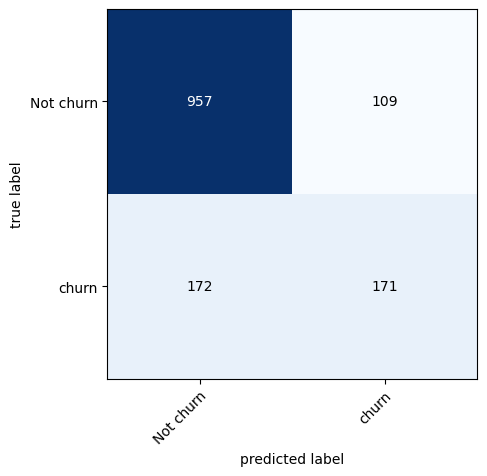

In [89]:
plot_confusion_matrix(cm_test, class_names = ["Not churn", "churn"])
plt.show()

#### Save the Model

In [90]:
import joblib

In [91]:
joblib.dump(lor_model,"churn Regression.pkl")

['churn Regression.pkl']

# K-NEAREST NEIGHBORS (K-NN)

In [92]:
# importing k-nearest neighbors

from sklearn.neighbors import KNeighborsClassifier

In [93]:
knn_model = KNeighborsClassifier(n_neighbors = 5, p = 2)

In [94]:
import time
time.time()

1681744075.7110493

In [95]:
#Save the data
st = time.time()
knn_model.fit(X_train,y_train)
et = time.time()
print("Total Time ::", et - st, "seconds")

Total Time :: 0.23755407333374023 seconds


In [98]:
train = np.array(X_train)

#### Prediction

In [97]:
#Actual model implemention starts
st = time.time()
y_pred = knn_model.predict(X_test)
et = time.time()
print("Total Time Testing ::", et - st, "seconds")

Total Time Testing :: 1.7563111782073975 seconds


C:\Karava\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [98]:
y_pred

array([0, 1, 0, ..., 0, 0, 1])

In [99]:
y_test

6418    0
1948    1
4497    0
66      0
1705    0
       ..
1901    0
5938    0
6373    0
1767    0
2184    1
Name: Churn, Length: 1409, dtype: int32

#### Accuracy Score

In [100]:
print("Test Accuracy Score:", accuracy_score(y_test, y_pred) * 100,"%")


Test Accuracy Score: 74.73385379701917 %


In [101]:
y_pred_train = knn_model.predict(train)

C:\Karava\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Karava\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [102]:
print("Train Accuracy Score:", accuracy_score(y_train, y_pred_train) * 100,"%")

Train Accuracy Score: 83.28008519701811 %


In [80]:
from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix

In [104]:
y_train.values

array([0, 0, 1, ..., 0, 0, 0])

In [99]:
X_train=np.array(train)

In [60]:
X_train

array([[ 0.  , 53.75,  0.  , ...,  0.  ,  1.  ,  0.  ],
       [ 0.  , 51.1 ,  1.  , ...,  0.  ,  0.  ,  0.  ],
       [ 1.  , 86.85,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.  , 20.5 ,  1.  , ...,  0.  ,  0.  ,  0.  ],
       [ 1.  , 95.35,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [ 0.  , 68.8 ,  0.  , ...,  0.  ,  0.  ,  1.  ]])

In [107]:
cm_test = confusion_matrix(y_test, y_pred)

In [108]:
cm_test

array([[887, 179],
       [177, 166]], dtype=int64)

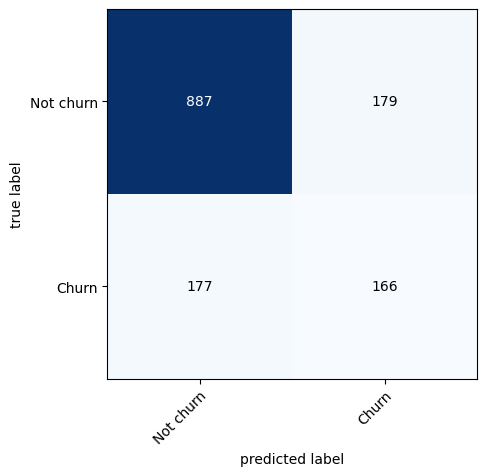

In [109]:
plot_confusion_matrix(cm_test, class_names = ["Not churn", "Churn"])
plt.show()

In [110]:
cm_train = confusion_matrix(y_train, y_pred_train)
cm_train

array([[3675,  433],
       [ 509, 1017]], dtype=int64)

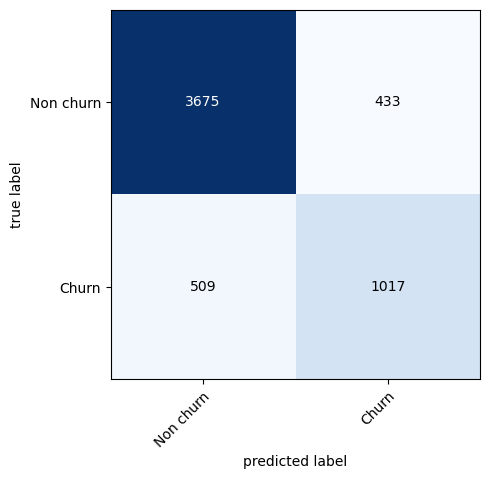

In [111]:
plot_confusion_matrix(cm_train, class_names = ["Non churn","Churn"])
plt.show()

##### Save the Model

In [112]:
import joblib

In [113]:
joblib.dump(lor_model,"churn_prediction.pkl")

['churn_prediction.pkl']

# SUPPORT VECTOR MACHINES (SVM)

### Build the model and Prediction

In [114]:
#SVC -- Support vector classification
from sklearn.svm import SVC

In [115]:
svm_model = SVC(kernel = "linear")

In [116]:
svm_model.fit(X_train,y_train)

SVC(kernel='linear')

In [117]:
# Prediction
y_pred = svm_model.predict(X_test)

C:\Karava\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [118]:
y_pred

array([0, 1, 0, ..., 0, 0, 1])

In [119]:
# Accuracy Score

In [120]:

cm = confusion_matrix(y_test, y_pred)
print(cm)
acc_svm = accuracy_score(y_test, y_pred)
print(acc_svm)


[[952 114]
 [158 185]]
0.8069552874378992


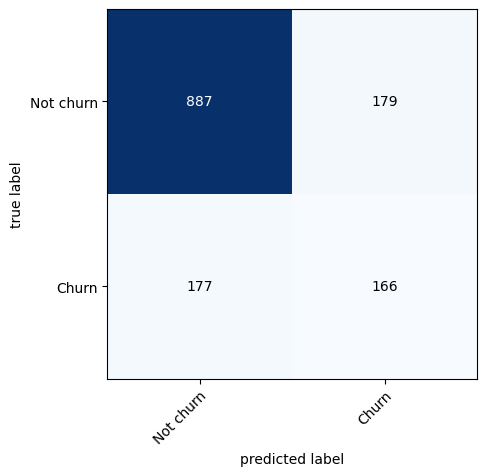

In [121]:
plot_confusion_matrix(cm_test, class_names = ["Not churn", "Churn"])
plt.show()

In [122]:
# save the Model

In [123]:
joblib.dump(lor_model,"churn_prediction1.pkl")

['churn_prediction1.pkl']

# Decision Trees

#### Saving the model and Prediction and Accuracy Score

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
# {'criterion': 'entropy',
#  'max_depth': 5,
#  'min_impurity_decrease': 0.0001,
#  'min_samples_leaf': 5,
#  'min_samples_split': 15}
dt_model = DecisionTreeClassifier(criterion = "entropy", max_depth = 5, min_impurity_decrease = 0.0001,
                                 min_samples_leaf = 5, min_samples_split = 15)

In [63]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5,
                       min_impurity_decrease=0.0001, min_samples_leaf=5,
                       min_samples_split=15)

In [64]:
# Prditction

In [65]:
y_pred = dt_model.predict(X_test)

C:\Karava\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [66]:
y_pred

array([0, 1, 0, ..., 0, 0, 1])

In [67]:
y_test

6418    0
1948    1
4497    0
66      0
1705    0
       ..
1901    0
5938    0
6373    0
1767    0
2184    1
Name: Churn, Length: 1409, dtype: int32

In [68]:
# Accuracy score

In [72]:
print("Test Accuracy Score:", accuracy_score(y_test, y_pred) * 100,"%")

Test Accuracy Score: 79.347054648687 %


In [73]:
y_pred_train = dt_model.predict(X_train)

In [74]:
print("Train Accuracy Score:", accuracy_score(y_train, y_pred_train) * 100,"%")

Train Accuracy Score: 79.69471068512603 %


In [75]:
y_train.value_counts()
y_train.value_counts() / len(y_train)

0    0.729144
1    0.270856
Name: Churn, dtype: float64

In [76]:
cm_test = confusion_matrix(y_test, y_pred)
cm_test

array([[942, 124],
       [167, 176]], dtype=int64)

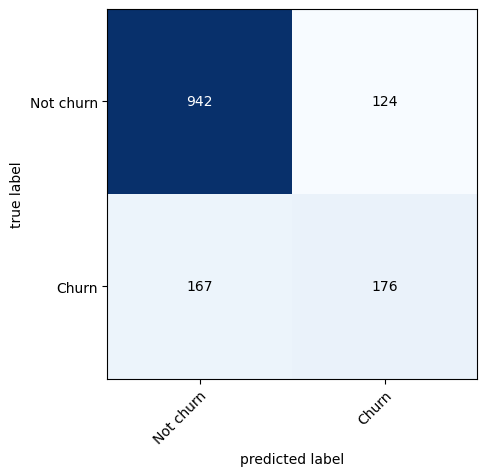

In [81]:
plot_confusion_matrix(cm_test, class_names = ["Not churn", "Churn"])
plt.show()

In [82]:
# Y_trainand Y_pred_train

cm_train = confusion_matrix(y_train, y_pred_train)
cm_train

array([[3683,  425],
       [ 719,  807]], dtype=int64)

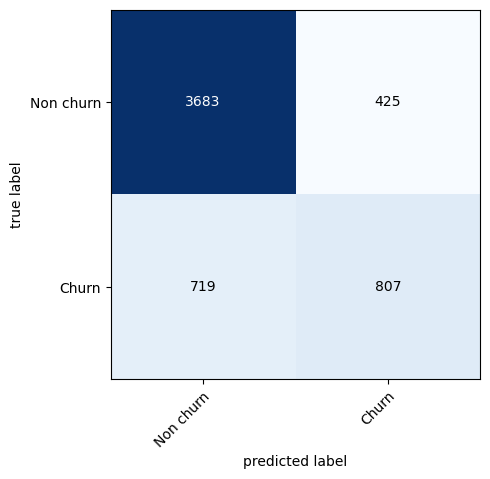

In [83]:
plot_confusion_matrix(cm_train, class_names = ["Non churn","Churn"])
plt.show()

In [84]:
from sklearn.metrics import classification_report

In [85]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1066
           1       0.59      0.51      0.55       343

    accuracy                           0.79      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.79      0.79      0.79      1409



In [86]:
from sklearn.tree import plot_tree

In [114]:
X_train.head()

,SeniorCitizen,MonthlyCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,tenure_grouped_0-12,tenure_grouped_13-24,tenure_grouped_25-36,tenure_grouped_37-48,tenure_grouped_49-60,tenure_grouped_61-72
1182,0,53.75,0,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4328,0,51.10,1,0,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
6091,1,86.85,0,1,0,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4870,0,64.40,0,1,1,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
4683,0,94.10,0,1,1,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [115]:
dt_model.get_depth()

5

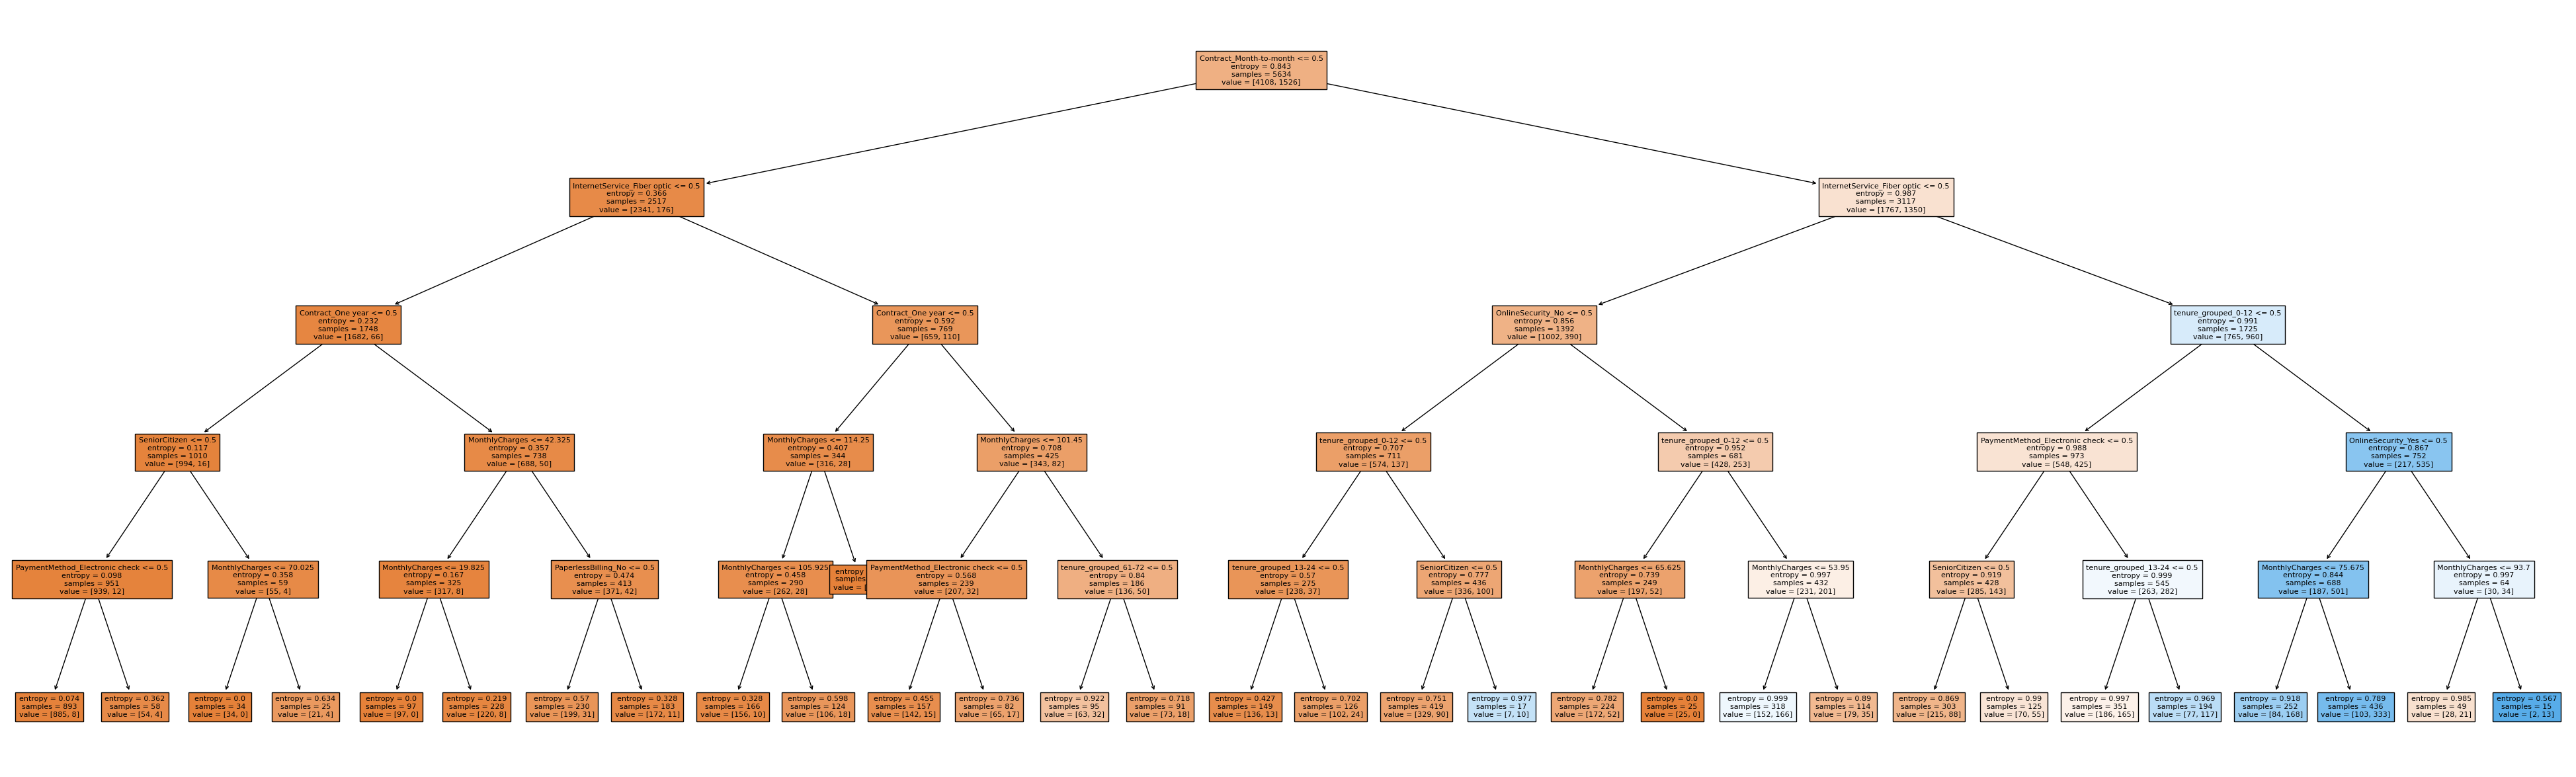

In [116]:
plt.figure(figsize = (50, 15)) # w,h
plot_tree(dt_model, fontsize = 8, filled = True, feature_names = X_train.columns)
plt.show()

#### Hyperparameter tunning

In [117]:
from sklearn.model_selection import GridSearchCV

In [118]:
dt_model = DecisionTreeClassifier()

In [119]:
# max_features = ['auto', 'sqrt','log2']
max_depth = np.linspace(3, 12, 6,dtype="int")
min_samples_split = [2, 5, 10, 15, 30, 35]
min_samples_leaf = [1, 2, 5, 10, 15]
criterion = ["gini","entropy"]
min_impurity_decrease = np.linspace(0.0001, 0.0005, 8)

In [120]:
#key -- Hyperparameter name
#value -- list of hyperpameters values
param_grid = {"max_depth":max_depth, "min_samples_split":min_samples_split,
             "min_samples_leaf":min_samples_leaf, "criterion": criterion,
             "min_impurity_decrease": min_impurity_decrease}

In [121]:
param_grid

{'max_depth': array([ 3,  4,  6,  8, 10, 12]),
 'min_samples_split': [2, 5, 10, 15, 30, 35],
 'min_samples_leaf': [1, 2, 5, 10, 15],
 'criterion': ['gini', 'entropy'],
 'min_impurity_decrease': array([0., 0., 0., 0., 0., 0., 0., 0.])}

In [122]:
##estimator -- model instance
#scoring -- model performance calculation metric
gsv = GridSearchCV(dt_model, param_grid, scoring = "accuracy", n_jobs = -1, cv = 3, verbose = 100)

In [123]:
gsv.fit(X_train, y_train)

Fitting 3 folds for each of 2880 candidates, totalling 8640 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  6,  8, 10, 12]),
                         'min_impurity_decrease': array([0., 0., 0., 0., 0., 0., 0., 0.]),
                         'min_samples_leaf': [1, 2, 5, 10, 15],
                         'min_samples_split': [2, 5, 10, 15, 30, 35]},
             scoring='accuracy', verbose=100)

In [124]:
gsv.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_impurity_decrease': 0.0004428571428571429,
 'min_samples_leaf': 15,
 'min_samples_split': 2}

In [125]:
gsv.best_score_

0.7878949236776713

##### Randomized search CV

In [126]:
from sklearn.model_selection import RandomizedSearchCV
dt_model = DecisionTreeClassifier()

In [127]:
rsv = RandomizedSearchCV(dt_model, param_grid, n_iter = 500, scoring = "accuracy", n_jobs = -1, cv = 3, verbose = 100)

In [128]:
rsv.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=500,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 3,  4,  6,  8, 10, 12]),
                                        'min_impurity_decrease': array([0., 0., 0., 0., 0., 0., 0., 0.]),
                                        'min_samples_leaf': [1, 2, 5, 10, 15],
                                        'min_samples_split': [2, 5, 10, 15, 30,
                                                              35]},
                   scoring='accuracy', verbose=100)

In [129]:
rsv.best_params_

{'min_samples_split': 15,
 'min_samples_leaf': 15,
 'min_impurity_decrease': 0.0005,
 'max_depth': 6,
 'criterion': 'gini'}

In [130]:
rsv.best_score_

0.7878949236776713

In [131]:
# Saving the model
import joblib

joblib.dump(dt_model,"churn_prediction2.pkl")

['churn_prediction2.pkl']

# RANDOM FOREST

In [156]:
from sklearn.ensemble import RandomForestClassifier

In [158]:
rf_model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_model

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [159]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [160]:
y_pred =rf_model.predict(X_test)

In [163]:
cm_test = confusion_matrix(y_test, y_pred)
cm_test

array([[948, 118],
       [209, 134]], dtype=int64)

In [164]:
# Accuracy Score

In [165]:
print("Test Accuracy Score:", accuracy_score(y_test, y_pred) * 100,"%")

Test Accuracy Score: 76.79205110007096 %


In [166]:
y_pred_train = rf_model.predict(X_train)

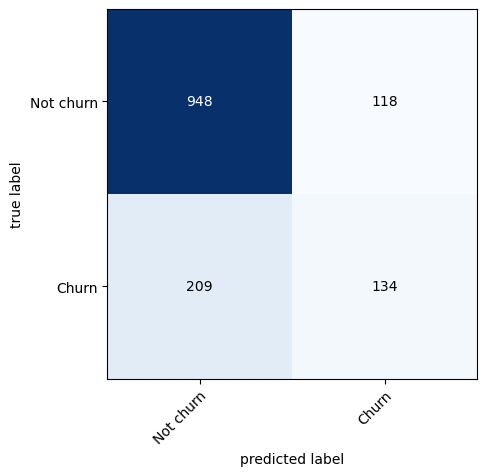

In [167]:
#X_train

plot_confusion_matrix(cm_test, class_names = ["Not churn", "Churn"])
plt.show()

In [168]:
# Y_trainand Y_pred_train

cm_train = confusion_matrix(y_train, y_pred_train)
cm_train

array([[4097,   11],
       [  99, 1427]], dtype=int64)

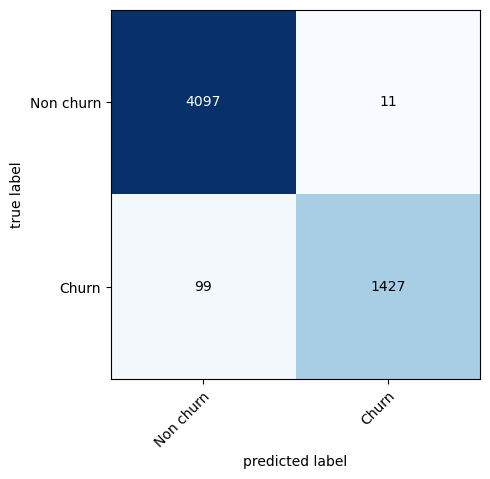

In [169]:
plot_confusion_matrix(cm_train, class_names = ["Non churn","Churn"])
plt.show()

In [170]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1066
           1       0.53      0.39      0.45       343

    accuracy                           0.77      1409
   macro avg       0.68      0.64      0.65      1409
weighted avg       0.75      0.77      0.75      1409



#  Conclusion
We went through the various tasks involved in Churn prediction in this article. It is important to note that finding patterns in 

Exploratory Data Analysis (EDA) is as important as the final prediction itself.

A Churn prediction task remains unfinished if the data patterns are not found in EDA. 

This skill is not only limited to Churn prediction but will also help you in the solving of the usual data science problems.